In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
import numpy as np

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv (r'C:\Users\lokit\Documents\Newspaper\urbana_crimes.csv')
print (df)

       ARREST TYPE DESCRIPTION  AGE AT ARREST ARRESTEE SEX ARRESTEE RACE  \
0                     SUMMONED             21       FEMALE         WHITE   
1                     SUMMONED             62         MALE         WHITE   
2                      ON VIEW             43       FEMALE         WHITE   
3               WARRANT ARREST             28         MALE         WHITE   
4               WARRANT ARREST             28         MALE         WHITE   
...                        ...            ...          ...           ...   
189681                SUMMONED             28       FEMALE         WHITE   
189682                SUMMONED             27         MALE         WHITE   
189683                SUMMONED             35         MALE         BLACK   
189684                SUMMONED             17         MALE         WHITE   
189685                SUMMONED             22       FEMALE         BLACK   

       ARRESTEE EMPLOYMENT DESCRIPTION ARRESTEE RESIDENCY DESCRIPTION  COUNT  
0       

In [39]:

data = df[['AGE AT ARREST','ARRESTEE SEX','ARRESTEE RACE','ARRESTEE EMPLOYMENT DESCRIPTION']]
data

,AGE AT ARREST,ARRESTEE SEX,ARRESTEE RACE,ARRESTEE EMPLOYMENT DESCRIPTION
0,21,FEMALE,WHITE,UNKNOWN
1,62,MALE,WHITE,UNKNOWN
2,43,FEMALE,WHITE,EMPLOYED
3,28,MALE,WHITE,UNEMPLOYED
4,28,MALE,WHITE,UNEMPLOYED
...,...,...,...,...
189681,28,FEMALE,WHITE,UNKNOWN
189682,27,MALE,WHITE,UNKNOWN
189683,35,MALE,BLACK,NaN
189684,17,MALE,WHITE,UNKNOWN


In [40]:
data['ARRESTEE SEX'].value_counts()

MALE      129230
FEMALE     60425
.             31
Name: ARRESTEE SEX, dtype: int64

In [41]:
data['ARRESTEE RACE'].value_counts()

WHITE                      95664
BLACK                      78373
ASIAN/PACIFIC ISLAND        8686
HISPANIC                    6536
AMERICAN INDIAN/ALASKAN      214
UNKNOWN                      157
.                             55
BUSINESS OR OTHER              1
Name: ARRESTEE RACE, dtype: int64

In [42]:
data['ARRESTEE EMPLOYMENT DESCRIPTION'].value_counts()

UNKNOWN              87789
UNEMPLOYED           23612
EMPLOYED             21547
FULL-TIME STUDENT    11107
MILITARY                 9
Name: ARRESTEE EMPLOYMENT DESCRIPTION, dtype: int64

In [43]:
cleanup_data = {"ARRESTEE SEX":     {"MALE": float(1), "FEMALE": float(2),".":float(3)},
                "ARRESTEE RACE": {"WHITE": float(1), "BLACK": float(2), "ASIAN/PACIFIC ISLAND": float(3), "HISPANIC": float(4),"AMERICAN INDIAN/ALASKAN":float(5),"UNKNOWN":float(6),".":float(7),"BUSINESS OR OTHER":float(8)},
               'ARRESTEE EMPLOYMENT DESCRIPTION':{"UNKNOWN":float(1),"UNEMPLOYED":float(2),"EMPLOYED":float(3),"FULL-TIME STUDENT":float(4),"MILITARY":float(5)}}


In [44]:
kluster=data.replace(cleanup_data)
kluster

,AGE AT ARREST,ARRESTEE SEX,ARRESTEE RACE,ARRESTEE EMPLOYMENT DESCRIPTION
0,21,2.0,1.0,1.0
1,62,1.0,1.0,1.0
2,43,2.0,1.0,3.0
3,28,1.0,1.0,2.0
4,28,1.0,1.0,2.0
...,...,...,...,...
189681,28,2.0,1.0,1.0
189682,27,1.0,1.0,1.0
189683,35,1.0,2.0,NaN
189684,17,1.0,1.0,1.0


In [55]:
kluster.apply(pd.to_numeric)
kluster=kluster.dropna()
kluster.apply(pd.to_numeric)
kluster

,AGE AT ARREST,ARRESTEE SEX,ARRESTEE RACE,ARRESTEE EMPLOYMENT DESCRIPTION
0,21,2.0,1.0,1.0
1,62,1.0,1.0,1.0
2,43,2.0,1.0,3.0
3,28,1.0,1.0,2.0
4,28,1.0,1.0,2.0
...,...,...,...,...
189680,18,1.0,1.0,1.0
189681,28,2.0,1.0,1.0
189682,27,1.0,1.0,1.0
189684,17,1.0,1.0,1.0


In [57]:
type(kluster)

pandas.core.frame.DataFrame

In [62]:
kluster=kluster[kluster > 0].dropna()
kluster=kluster[kluster < 100].dropna()
kluster["AGE AT ARREST"].value_counts()

20.0    8907
21.0    8462
19.0    8294
22.0    7522
18.0    6870
        ... 
96.0       4
94.0       3
5.0        1
95.0       1
6.0        1
Name: AGE AT ARREST, Length: 94, dtype: int64

In [63]:
kluster["ARRESTEE SEX"].value_counts()

1.0    96785
2.0    47239
Name: ARRESTEE SEX, dtype: int64

In [64]:
kluster["ARRESTEE RACE"].value_counts()

1.0    67246
2.0    64049
3.0     6428
4.0     6035
5.0      148
6.0      116
7.0        1
8.0        1
Name: ARRESTEE RACE, dtype: int64

In [65]:
kluster["ARRESTEE EMPLOYMENT DESCRIPTION"].value_counts()

1.0    87756
2.0    23610
3.0    21543
4.0    11106
5.0        9
Name: ARRESTEE EMPLOYMENT DESCRIPTION, dtype: int64

In [75]:
import sklearn.cluster as cluster

In [82]:
k1=cluster.KMeans(n_clusters=3,init="k-means++")
k1=k1.fit(kluster[['AGE AT ARREST','ARRESTEE SEX']])

In [83]:
k1.cluster_centers_

array([[55.85099338,  1.36115551],
       [21.18103205,  1.31514424],
       [35.71177009,  1.34031124]])

In [84]:
d1=kluster
d1['CLUSTERS']=k1.labels_

In [85]:
d1.head()

,AGE AT ARREST,ARRESTEE SEX,ARRESTEE RACE,ARRESTEE EMPLOYMENT DESCRIPTION,CLUSTERS
0,21.0,2.0,1.0,1.0,1
1,62.0,1.0,1.0,1.0,0
2,43.0,2.0,1.0,3.0,2
3,28.0,1.0,1.0,2.0,1
4,28.0,1.0,1.0,2.0,1


<AxesSubplot:xlabel='AGE AT ARREST', ylabel='ARRESTEE SEX'>

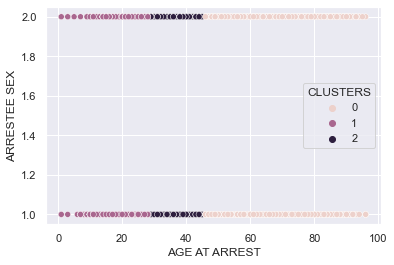

In [87]:
sns.scatterplot(x='AGE AT ARREST',y='ARRESTEE SEX',hue='CLUSTERS',data=d1)

In [89]:
k2=cluster.KMeans(n_clusters=3,init="k-means++")
k2=k2.fit(kluster[['AGE AT ARREST','ARRESTEE RACE']])

In [92]:
d2=kluster
d2['CLUSTERS']=k2.labels_

<AxesSubplot:xlabel='AGE AT ARREST', ylabel='ARRESTEE RACE'>

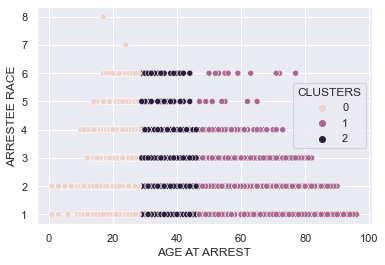

In [93]:
sns.scatterplot(x='AGE AT ARREST',y='ARRESTEE RACE',hue='CLUSTERS',data=d2)

In [94]:
k3=cluster.KMeans(n_clusters=3,init="k-means++")
k3=k3.fit(kluster[['AGE AT ARREST','ARRESTEE EMPLOYMENT DESCRIPTION']])
d3=kluster
d3['CLUSTERS']=k3.labels_

<AxesSubplot:xlabel='AGE AT ARREST', ylabel='ARRESTEE EMPLOYMENT DESCRIPTION'>

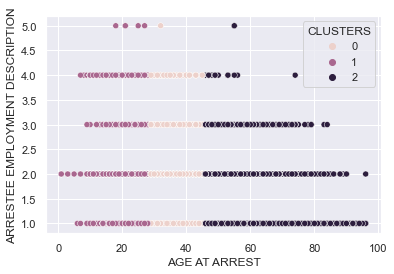

In [95]:
sns.scatterplot(x='AGE AT ARREST',y='ARRESTEE EMPLOYMENT DESCRIPTION',hue='CLUSTERS',data=d3)

In [102]:
k4=cluster.KMeans(n_clusters=3,init="k-means++")
k4=k4.fit(kluster[['ARRESTEE SEX','ARRESTEE RACE']])
d4=kluster
d4['CLUSTERS']=k4.labels_

<AxesSubplot:xlabel='ARRESTEE SEX', ylabel='ARRESTEE RACE'>

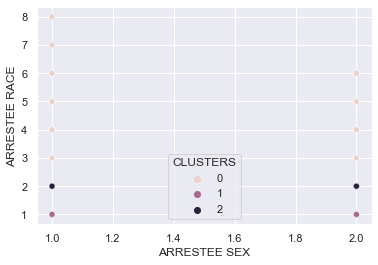

In [103]:
sns.scatterplot(x='ARRESTEE SEX',y='ARRESTEE RACE',hue='CLUSTERS',data=d4)

In [104]:
k5=cluster.KMeans(n_clusters=3,init="k-means++")
k5=k5.fit(kluster[['ARRESTEE SEX','ARRESTEE EMPLOYMENT DESCRIPTION']])
d5=kluster
d5['CLUSTERS']=k5.labels_

<AxesSubplot:xlabel='ARRESTEE SEX', ylabel='ARRESTEE EMPLOYMENT DESCRIPTION'>

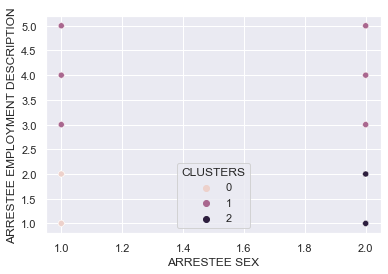

In [105]:
sns.scatterplot(x='ARRESTEE SEX',y='ARRESTEE EMPLOYMENT DESCRIPTION',hue='CLUSTERS',data=d5)

In [106]:
k6=cluster.KMeans(n_clusters=3,init="k-means++")
k6=k6.fit(kluster[['ARRESTEE RACE','ARRESTEE EMPLOYMENT DESCRIPTION']])
d6=kluster
d6['CLUSTERS']=k6.labels_

<AxesSubplot:xlabel='ARRESTEE RACE', ylabel='ARRESTEE EMPLOYMENT DESCRIPTION'>

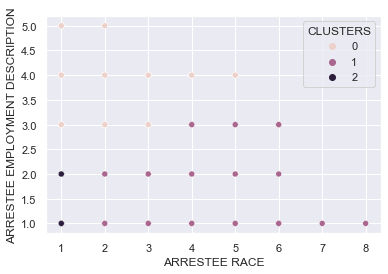

In [107]:
sns.scatterplot(x='ARRESTEE RACE',y='ARRESTEE EMPLOYMENT DESCRIPTION',hue='CLUSTERS',data=d6)

In [112]:
#Analysis of clusters
d11=d1[d1['CLUSTERS']==0]
d11["AGE AT ARREST"].mode()

0    19.0
dtype: float64

In [113]:
d11['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [114]:
d11['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [115]:
d11['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    3.0
dtype: float64

In [116]:
d12=d1[d1['CLUSTERS']==1]
d12["AGE AT ARREST"].mode()

0    21.0
dtype: float64

In [117]:
d12['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [118]:
d12['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [119]:
d12['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [120]:
d13=d1[d1['CLUSTERS']==2]
d13["AGE AT ARREST"].mode()

0    20.0
dtype: float64

In [121]:
d13['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [122]:
d13['ARRESTEE RACE'].mode()

0    1.0
dtype: float64

In [123]:
d13['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [124]:
d21=d2[d2['CLUSTERS']==0]
d21["AGE AT ARREST"].mode()

0    19.0
dtype: float64

In [125]:
d21['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [126]:
d21['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [127]:
d21['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    3.0
dtype: float64

In [128]:
d22=d2[d2['CLUSTERS']==1]
d22["AGE AT ARREST"].mode()

0    21.0
dtype: float64

In [129]:
d22['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [130]:
d22['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [131]:
d22['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [132]:
d23=d2[d2['CLUSTERS']==2]
d23["AGE AT ARREST"].mode()

0    20.0
dtype: float64

In [133]:
d23['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [134]:
d23['ARRESTEE RACE'].mode()

0    1.0
dtype: float64

In [135]:
d23['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [137]:
d31=d3[d3['CLUSTERS']==0]
d31["AGE AT ARREST"].mode()

0    19.0
dtype: float64

In [141]:
d31['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [142]:
d31['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [143]:
d31['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    3.0
dtype: float64

In [153]:
d32=d3[d3['CLUSTERS']==1]
d32["AGE AT ARREST"].mode()

0    21.0
dtype: float64

In [154]:
d32['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [155]:
d32['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [156]:
d32['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [157]:
d33=d3[d3['CLUSTERS']==2]
d33["AGE AT ARREST"].mode()

0    20.0
dtype: float64

In [158]:
d33['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [159]:
d33['ARRESTEE RACE'].mode()

0    1.0
dtype: float64

In [160]:
d33['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [161]:
d41=d4[d4['CLUSTERS']==0]
d41["AGE AT ARREST"].mode()

0    19.0
dtype: float64

In [162]:
d41['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [163]:
d41['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [164]:
d41['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    3.0
dtype: float64

In [165]:
d42=d4[d4['CLUSTERS']==1]
d42["AGE AT ARREST"].mode()

0    21.0
dtype: float64

In [166]:
d42['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [167]:
d42['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [169]:
d42['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [170]:
d43=d4[d4['CLUSTERS']==2]
d43["AGE AT ARREST"].mode()

0    20.0
dtype: float64

In [171]:
d43['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [172]:
d43['ARRESTEE RACE'].mode()

0    1.0
dtype: float64

In [173]:
d43['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [174]:
d51=d5[d5['CLUSTERS']==0]
d51["AGE AT ARREST"].mode()

0    19.0
dtype: float64

In [175]:
d51['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [177]:
d51['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [178]:
d51['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    3.0
dtype: float64

In [180]:
d52=d5[d5['CLUSTERS']==1]
d52["AGE AT ARREST"].mode()

0    21.0
dtype: float64

In [181]:
d52['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [182]:
d52['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [183]:
d52['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [184]:
d53=d5[d5['CLUSTERS']==2]
d53["AGE AT ARREST"].mode()

0    20.0
dtype: float64

In [185]:
d53['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [186]:
d53['ARRESTEE RACE'].mode()

0    1.0
dtype: float64

In [187]:
d53['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [188]:
d61=d6[d6['CLUSTERS']==0]
d61["AGE AT ARREST"].mode()

0    19.0
dtype: float64

In [189]:
d61['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [191]:
d61['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [192]:
d61['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    3.0
dtype: float64

In [193]:
d62=d6[d6['CLUSTERS']==1]
d62["AGE AT ARREST"].mode()

0    21.0
dtype: float64

In [194]:
d62['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [196]:
d62['ARRESTEE RACE'].mode()

0    2.0
dtype: float64

In [197]:
d62['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64

In [198]:
d63=d6[d6['CLUSTERS']==2]
d63["AGE AT ARREST"].mode()

0    20.0
dtype: float64

In [199]:
d63['ARRESTEE SEX'].mode()

0    1.0
dtype: float64

In [200]:
d63['ARRESTEE RACE'].mode()

0    1.0
dtype: float64

In [201]:
d63['ARRESTEE EMPLOYMENT DESCRIPTION'].mode()

0    1.0
dtype: float64